In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import geopandas as gpd
from shapely.geometry import Point
import cartopy.crs as ccrs

In [2]:
df_sp = pd.read_csv("../data/Raw/especies en peligro (1).csv")
df_sp.head()

/tmp/ipykernel_2190/3980527193.py:1: DtypeWarning: Columns (11,14) have mixed types. Specify dtype option on import or set low_memory=False.
  df_sp = pd.read_csv("../data/Raw/especies en peligro (1).csv")


,assessment_id,id_no,sci_name,presence,origin,seasonal,compiler,yrcompiled,citation,legend,subspecies,subpop,dist_comm,island,tax_comm,source,basisofrec,event_year,dec_long,dec_lat
0,497499,132523146,Hubbsina turneri,1,1,1,IUCN Freshwater Biodiversity Unit,2018,"Köck, GWG",Extant (resident),,,,,,de Jong,,2014.0,-101.47950,19.87450
1,497499,132523146,Hubbsina turneri,1,1,1,IUCN Freshwater Biodiversity Unit,2018,"Köck, GWG",Extant (resident),,,,,,Köck et al.,,2014.0,-101.77730,19.82560
2,497499,132523146,Hubbsina turneri,1,1,1,IUCN Freshwater Biodiversity Unit,2018,"Köck, GWG",Extant (resident),,,,,,Lyons,,2015.0,-101.78760,19.82730
3,498476,10769,Ictalurus mexicanus,1,1,1,"Soto-Galera, E. and L. Alcántara-Soria, ENCB-I...",2018,IUCN (International Union for Conservation of ...,Extant (resident),,,,,,,PRESERVED_SPECIMEN,1971.0,-99.35417,21.98083
4,498476,10769,Ictalurus mexicanus,1,1,1,"Soto-Galera, E. and L. Alcántara-Soria, ENCB-I...",2018,IUCN (International Union for Conservation of ...,Extant (resident),,,,,,,PRESERVED_SPECIMEN,1974.0,-99.30000,22.00000


In [3]:
df_sp.duplicated().sum()

np.int64(0)

In [4]:
# Porcentaje de Nans por columna
df_sp.isna().mean().sort_values(ascending=False)*100

tax_comm         96.772150
subpop           89.884041
subspecies       89.720821
island           87.622110
dist_comm        64.432751
event_year       52.585934
basisofrec       19.733733
source           12.096519
citation          0.037760
compiler          0.037760
id_no             0.000000
assessment_id     0.000000
presence          0.000000
sci_name          0.000000
seasonal          0.000000
yrcompiled        0.000000
legend            0.000000
origin            0.000000
dec_long          0.000000
dec_lat           0.000000
dtype: float64

In [5]:
cols_to_drop = ["tax_comm", "subpop", "subspecies", "island", "dist_comm", "compiler", "event_year"]

df_sp.drop(columns=cols_to_drop, inplace=True)
df_sp.shape

(82098, 13)

In [6]:
df_sp.duplicated().sum()

np.int64(2809)

In [7]:
df_sp.drop_duplicates()
df_sp.shape

(82098, 13)

In [8]:
df_sp.duplicated().sum()

np.int64(2809)

In [9]:
# Distribución de especies

num_species = df_sp["sci_name"].nunique()

species_counts = df_sp["sci_name"].value_counts()
species_counts

sci_name
Lampyris noctiluca          32520
Desmophyllum pertusum       14154
Paragorgia arborea           3769
Pennatula phosphorea         3559
Argynnis idalia               822
                            ...  
Fundulus philpisteri            1
Cephalaeschna algorei           1
Glyptothorax nelsoni            1
Zoogoneticus tequila            1
Rhinobranchipus martensi        1
Name: count, Length: 1762, dtype: int64

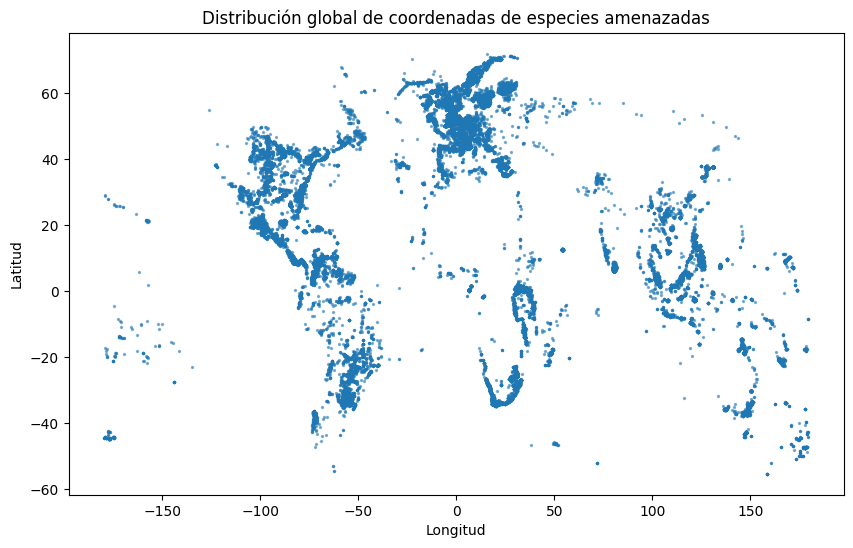

In [10]:
plt.figure(figsize=(10,6))
plt.scatter(df_sp['dec_long'], df_sp['dec_lat'], s=2, alpha=0.5)
plt.title("Distribución global de coordenadas de especies amenazadas")
plt.xlabel("Longitud")
plt.ylabel("Latitud")
plt.show()

In [11]:
# Enlace a fuente pública de datos geográficos
url = "https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_0_countries.zip"
world = gpd.read_file(url)

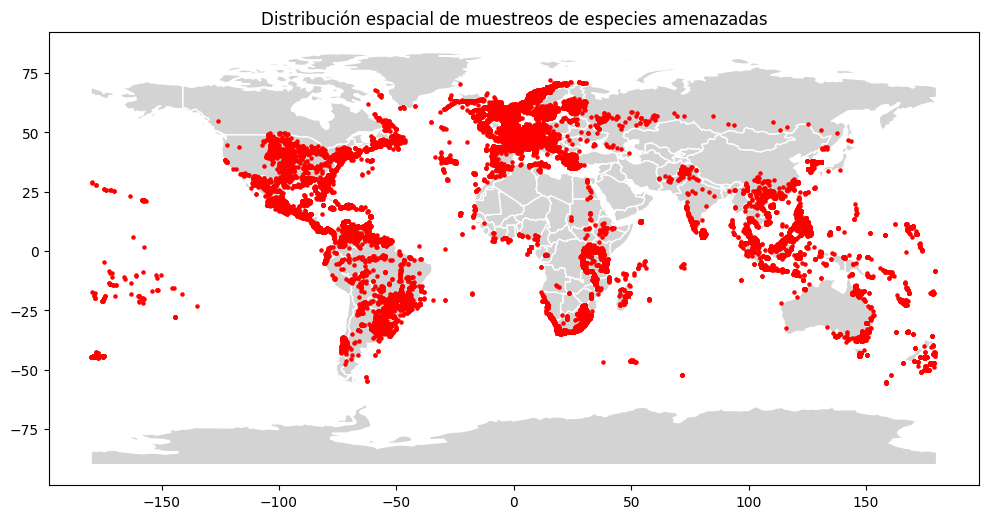

In [12]:
fig, ax = plt.subplots(figsize=(12,8))

# Plot mapa mundial
world.plot(ax=ax, color='lightgrey', edgecolor='white')

# Plot puntos
gdf = gpd.GeoDataFrame(
    df_sp, 
    geometry=gpd.points_from_xy(df_sp.dec_long, df_sp.dec_lat),
    

    crs="EPSG:4326"
)

gdf.plot(ax=ax, markersize=5, color='red')

plt.title("Distribución espacial de muestreos de especies amenazadas")
plt.show()

In [13]:
df_sp.duplicated().sum()

np.int64(2809)

In [14]:
df_mar = pd.read_csv("../data/Raw/Marine_Microplastics_WGS84_8553846406879449657.csv")
df_mar

,OBJECTID,Latitude (degree),Longitude(degree),Ocean,Region,Subregion,Country,State,Beach Location,Marine Setting,...,DOI,ORGANIZATION,KEYWORDS,NCEI Accession No,NCEI Accession No. Link,Symbology,GlobalID,Date (MM-DD-YYYY),x,y
0,1,45.280000,-60.290000,Atlantic Ocean,NaN,NaN,NaN,NaN,NaN,Ocean water,...,https://doi.org/10.1126/science.1192321,Sea Education Association,SEA,211007,https://www.ncei.noaa.gov/access/metadata/land...,"Ocean Surface, Very Low, 0-0.0005 pieces/m3",2ce1d1d4-4231-4ab8-af74-0b7fbb1e028b,7/13/1989 12:00:00 AM,-60.290000,45.280000
1,2,40.930000,-70.650000,Atlantic Ocean,NaN,NaN,NaN,NaN,NaN,Ocean water,...,https://doi.org/10.1126/science.1192321,Sea Education Association,SEA,211007,https://www.ncei.noaa.gov/access/metadata/land...,"Ocean Surface, Low, 0.0005-0.005 pieces/m3",8e3c8426-5ab0-421e-abb2-6b90197ada7a,10/12/1989 12:00:00 AM,-70.650000,40.930000
2,3,40.930000,-70.650000,Atlantic Ocean,NaN,NaN,NaN,NaN,NaN,Ocean water,...,https://doi.org/10.1126/science.1192321,Sea Education Association,SEA,211007,https://www.ncei.noaa.gov/access/metadata/land...,"Ocean Surface, Low, 0.0005-0.005 pieces/m3",99bda337-9f0c-4f58-9960-8b00c1110a7c,10/12/1989 12:00:00 AM,-70.650000,40.930000
3,4,40.300000,-69.770000,Atlantic Ocean,NaN,NaN,NaN,NaN,NaN,Ocean water,...,https://doi.org/10.1126/science.1192321,Sea Education Association,SEA,211007,https://www.ncei.noaa.gov/access/metadata/land...,"Ocean Surface, Very Low, 0-0.0005 pieces/m3",1f20e926-2a84-4e42-8478-8a5af5aecacc,10/12/1989 12:00:00 AM,-69.770000,40.300000
4,5,39.880000,-67.150000,Atlantic Ocean,NaN,NaN,NaN,NaN,NaN,Ocean water,...,https://doi.org/10.1126/science.1192321,Sea Education Association,SEA,211007,https://www.ncei.noaa.gov/access/metadata/land...,"Ocean Surface, Very Low, 0-0.0005 pieces/m3",a0df6bee-9c60-4621-a0bc-3329e3f11720,10/15/1989 12:00:00 AM,-67.150000,39.880000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22525,22941,-5.933333,39.360000,Indian Ocean,NaN,NaN,Tanzania,Zanzibar,Pwani-Mchangani,Ocean sediment,...,https://doi.org/10.1016/j.marpolbul.2022.114305,"University of Dar es Salaam, Tanzania",Tanzania,297601,https://www.ncei.noaa.gov/access/metadata/land...,"Ocean Sediment, High, 150-200 pieces kg-1 d.w.",47556e88-2992-48a6-a94d-97dee9ec0f4a,12/23/2019 12:00:00 AM,39.360000,-5.933333
22526,22942,-5.500000,39.120000,Indian Ocean,NaN,NaN,Tanzania,Zanzibar,Nungwi,Ocean sediment,...,https://doi.org/10.1016/j.marpolbul.2022.114305,"University of Dar es Salaam, Tanzania",Tanzania,297601,https://www.ncei.noaa.gov/access/metadata/land...,"Ocean Sediment, High, 150-200 pieces kg-1 d.w.",55430f26-f5df-44d6-86bb-a532cca54bbc,12/22/2019 12:00:00 AM,39.120000,-5.500000
22527,22943,-6.450000,39.466667,Indian Ocean,NaN,NaN,Tanzania,Zanzibar,Kizimkazi,Ocean sediment,...,https://doi.org/10.1016/j.marpolbul.2022.114305,"University of Dar es Salaam, Tanzania",Tanzania,297601,https://www.ncei.noaa.gov/access/metadata/land...,"Ocean Sediment, Medium, 20-150 pieces kg-1 d.w.",c39e2f1f-1d4b-4f2f-830d-60abe0b88671,12/25/2019 12:00:00 AM,39.466667,-6.450000
22528,22944,-6.320000,39.210000,Indian Ocean,NaN,NaN,Tanzania,Zanzibar,Bububu,Ocean sediment,...,https://doi.org/10.1016/j.marpolbul.2022.114305,"University of Dar es Salaam, Tanzania",Tanzania,297601,https://www.ncei.noaa.gov/access/metadata/land...,"Ocean Sediment, Very High, >200 pieces kg-1 d.w.",c46c197f-38df-4f28-9118-b20252f3d123,12/28/2019 12:00:00 AM,39.210000,-6.320000


In [15]:
for col in df_mar.columns:
    print(col)

OBJECTID
Latitude (degree)
Longitude(degree)
Ocean
Region
Subregion
Country
State
Beach Location
Marine Setting
Ocean Bottom Depth (m)
Water Sample Depth (m)
Sediment Sample Depth (m)
Sampling Method
Mesh size (mm)
Transect No
Sampling point on beach
Volunteers Number
Standardized Nurdle  Amount
Microplastics measurement
Unit
Concentration class range
Concentration class text
Short Reference
Long Reference
DOI
ORGANIZATION
KEYWORDS
NCEI Accession No
NCEI Accession No. Link
Symbology
GlobalID
Date (MM-DD-YYYY)
x
y


In [16]:
df_mar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22530 entries, 0 to 22529
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   OBJECTID                     22530 non-null  int64  
 1   Latitude (degree)            22530 non-null  float64
 2   Longitude(degree)            22530 non-null  float64
 3   Ocean                        22252 non-null  object 
 4   Region                       10262 non-null  object 
 5   Subregion                    1523 non-null   object 
 6   Country                      6606 non-null   object 
 7   State                        6186 non-null   object 
 8   Beach Location               6245 non-null   object 
 9   Marine Setting               22530 non-null  object 
 10  Ocean Bottom Depth (m)       325 non-null    float64
 11  Water Sample Depth (m)       15521 non-null  float64
 12  Sediment Sample Depth (m)    386 non-null    float64
 13  Sampling Method 

In [17]:
df_mar["Unit"].unique()

array(['pieces/m3', 'pieces kg-1 d.w.', 'pieces/10 mins'], dtype=object)

In [18]:
nan_ratio = df_mar["Region"].isna().mean()
nan_ratio

np.float64(0.5445184198845983)

In [19]:
# cuántas filas tienen coordenadas
df_mar = df_mar.dropna(subset=["Latitude (degree)", "Longitude(degree)"])
len(df_mar)

22530

<Axes: >

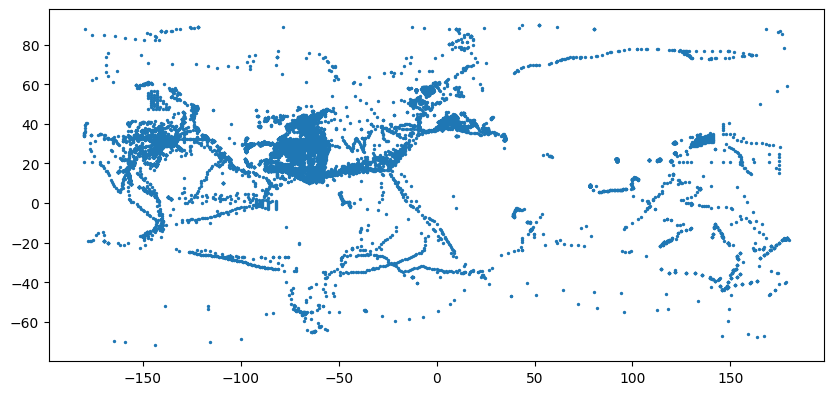

In [20]:
gdf = gpd.GeoDataFrame(
    df_mar,
    geometry=gpd.points_from_xy(df_mar.x, df_mar.y),
    crs="EPSG:4326"
)
gdf.plot(figsize=(10,8), markersize=2)

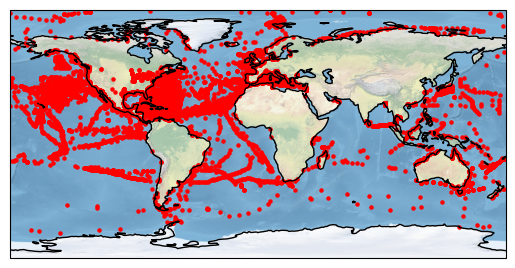

In [21]:
# Crea mapa mundial
ax = plt.axes(projection=ccrs.PlateCarree())
ax.stock_img()  # fondo del mapa
ax.coastlines() # líneas de costa

# Añade puntos
plt.scatter(df_mar['x'], df_mar['y'], s=5, color='red', transform=ccrs.PlateCarree())
plt.show()

In [22]:
gdf_land = gpd.sjoin(gdf, world, predicate="intersects", how="left")

gdf_land['is_land'] = gdf_land['ADMIN'].notna()
gdf_land['is_land'].value_counts()


is_land
False    18361
True      4169
Name: count, dtype: int64

Nº de filas con coordenadas: 22530

Puntos en Mar: 18361

Puntos en tierra: 4169

#### Limpieza datasets

In [23]:
df_sp = df_sp[[
    "assessment_id",
    "id_no",
    "sci_name",
    "presence",
    "origin",
    "seasonal",
    "dec_long",
    "dec_lat"    
]]

df_sp = df_sp.rename(columns = {
    "dec_long": "lon",
    "dec_lat": "lat"
})

df_sp = df_sp.dropna(subset=["lon", "lat"])

# Asegurar coordenadas como float
df_sp["lon"] = df_sp["lon"].astype(float)
df_sp["lat"] = df_sp["lat"].astype(float)

df_sp.head(10)

,assessment_id,id_no,sci_name,presence,origin,seasonal,lon,lat
0,497499,132523146,Hubbsina turneri,1,1,1,-101.47950,19.87450
1,497499,132523146,Hubbsina turneri,1,1,1,-101.77730,19.82560
2,497499,132523146,Hubbsina turneri,1,1,1,-101.78760,19.82730
3,498476,10769,Ictalurus mexicanus,1,1,1,-99.35417,21.98083
4,498476,10769,Ictalurus mexicanus,1,1,1,-99.30000,22.00000
5,500918,1117,Ameca splendens,1,1,1,-104.07930,20.90140
6,500918,1117,Ameca splendens,1,1,1,-103.84500,20.68010
7,500918,1117,Ameca splendens,1,1,1,-103.84330,20.68100
8,500918,1117,Ameca splendens,1,1,1,-103.84310,20.67610
9,500918,1117,Ameca splendens,1,1,1,-103.84270,20.67580


In [24]:
df_sp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82098 entries, 0 to 82097
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   assessment_id  82098 non-null  int64  
 1   id_no          82098 non-null  int64  
 2   sci_name       82098 non-null  object 
 3   presence       82098 non-null  int64  
 4   origin         82098 non-null  int64  
 5   seasonal       82098 non-null  int64  
 6   lon            82098 non-null  float64
 7   lat            82098 non-null  float64
dtypes: float64(2), int64(5), object(1)
memory usage: 5.0+ MB


In [25]:
df_sp.duplicated().sum()

np.int64(11807)

In [26]:
df_mar = df_mar[[
    "Microplastics measurement",
    "Unit",
    "Concentration class range",
    "Ocean",
    "Marine Setting",
    "Mesh size (mm)",
    "Latitude (degree)",
    "Longitude(degree)"
]]

df_mar = df_mar.rename(columns={
    "Latitude (degree)": "lat",
    "Longitude(degree)": "lon",
    "Microplastics measurement": "microplastics_measurement",
    "Concentration class range": "concentration_class_range",
    "Marine Setting": "marine_setting",
    "Water Sample Depth (m)": "water_sample_depth_m",
    "Mesh size (mm)": "mesh_size_mm"
})

df_mar.columns = df_mar.columns.str.lower()

# Asegurar coordenadas como float
df_mar["lon"] = df_mar["lon"].astype(float)
df_mar["lat"] = df_mar["lat"].astype(float)

df_mar.head(10)

,microplastics_measurement,unit,concentration_class_range,ocean,marine_setting,mesh_size_mm,lat,lon
0,0.000000,pieces/m3,0-0.0005,Atlantic Ocean,Ocean water,0.335,45.28,-60.29
1,0.002276,pieces/m3,0.0005-0.005,Atlantic Ocean,Ocean water,0.335,40.93,-70.65
2,0.004320,pieces/m3,0.0005-0.005,Atlantic Ocean,Ocean water,0.335,40.93,-70.65
3,0.000000,pieces/m3,0-0.0005,Atlantic Ocean,Ocean water,0.335,40.30,-69.77
4,0.000000,pieces/m3,0-0.0005,Atlantic Ocean,Ocean water,0.335,39.88,-67.15
5,0.043196,pieces/m3,0.005-1,Atlantic Ocean,Ocean water,0.335,37.83,-63.73
6,0.535636,pieces/m3,0.005-1,Atlantic Ocean,Ocean water,0.335,37.83,-63.73
7,0.069116,pieces/m3,0.005-1,Atlantic Ocean,Ocean water,0.335,36.90,-63.38
8,0.084232,pieces/m3,0.005-1,Atlantic Ocean,Ocean water,0.335,36.90,-63.38
9,0.299496,pieces/m3,0.005-1,Atlantic Ocean,Ocean water,0.335,35.70,-61.98


In [27]:
df_mar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22530 entries, 0 to 22529
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   microplastics_measurement  16713 non-null  float64
 1   unit                       22530 non-null  object 
 2   concentration_class_range  22530 non-null  object 
 3   ocean                      22252 non-null  object 
 4   marine_setting             22530 non-null  object 
 5   mesh_size_mm               16666 non-null  float64
 6   lat                        22530 non-null  float64
 7   lon                        22530 non-null  float64
dtypes: float64(4), object(4)
memory usage: 1.4+ MB


In [28]:
df_mar[df_mar['microplastics_measurement'].isna()]

,microplastics_measurement,unit,concentration_class_range,ocean,marine_setting,mesh_size_mm,lat,lon
15598,NaN,pieces/10 mins,2-40,Atlantic Ocean,Beach-Nurdle Patrol,NaN,27.2049,-97.3645
15599,NaN,pieces/10 mins,40-200,Atlantic Ocean,Beach-Nurdle Patrol,NaN,27.4147,-97.3016
15600,NaN,pieces/10 mins,40-200,Atlantic Ocean,Beach-Nurdle Patrol,NaN,27.6057,-97.2077
15601,NaN,pieces/10 mins,2-40,Atlantic Ocean,Beach-Nurdle Patrol,NaN,26.0983,-97.1623
15602,NaN,pieces/10 mins,1-2,Atlantic Ocean,Beach-Nurdle Patrol,NaN,27.8322,-97.3784
...,...,...,...,...,...,...,...,...
21410,NaN,pieces/10 mins,2-40,Atlantic Ocean,Beach-Nurdle Patrol,NaN,29.3351,-94.7287
21411,NaN,pieces/10 mins,40-200,Atlantic Ocean,Beach-Nurdle Patrol,NaN,29.3360,-94.7352
21412,NaN,pieces/10 mins,2-40,NaN,Beach-Nurdle Patrol,NaN,32.7114,-96.9773
21413,NaN,pieces/10 mins,2-40,Atlantic Ocean,Beach-Nurdle Patrol,NaN,29.3359,-94.7354


#### Convertir a GeoDataFrames

In [29]:
gdfsp = gpd.read_file("../data/GeoDataFrame/gdf_species.gpkg")
gdfmm = gpd.read_file("../data/GeoDataFrame/gdf_microplastics.gpkg")

In [30]:
print(gdfsp.crs, gdfmm.crs)
print(len(gdfsp), len(gdfmm))


EPSG:4326 EPSG:4326
70273 19322


In [31]:
# Cambiamos EPSG de grados a metros

gdfsp_m = gdfsp.to_crs(epsg=3395)
gdfmm_m = gdfmm.to_crs(epsg=3395)

In [32]:
# Unión por vecino más cercano

gdf_joined = gpd.sjoin_nearest(
    gdfsp_m,
    gdfmm_m,
    how="left",
    distance_col="dist_meters",
    max_distance=100_000
)
gdf_joined.head(10)

,sci_name,presence,origin,seasonal,lon_left,lat_left,geometry,index_right,microplastics_measurement,unit,concentration_class_range,mesh_size_mm,lat_right,lon_right,dist_meters
0,Hubbsina turneri,1,1,1,-101.47950,19.87450,POINT (-11296646.266 2243650.35),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Hubbsina turneri,1,1,1,-101.77730,19.82560,POINT (-11329797.21 2237897.269),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Hubbsina turneri,1,1,1,-101.78760,19.82730,POINT (-11330943.801 2238097.244),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Ictalurus mexicanus,1,1,1,-99.35417,21.98083,POINT (-11060055.613 2493237.221),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Ictalurus mexicanus,1,1,1,-99.30000,22.00000,POINT (-11054025.436 2495525.394),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Ameca splendens,1,1,1,-104.07930,20.90140,POINT (-11586054.678 2364888.282),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Ameca splendens,1,1,1,-103.84500,20.68010,POINT (-11559972.521 2338691.673),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Ameca splendens,1,1,1,-103.84330,20.68100,POINT (-11559783.278 2338798.133),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Ameca splendens,1,1,1,-103.84310,20.67610,POINT (-11559761.014 2338218.526),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Ameca splendens,1,1,1,-103.84270,20.67580,POINT (-11559716.487 2338183.04),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
gdf_joined.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 71986 entries, 0 to 70272
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   sci_name                   71986 non-null  object  
 1   presence                   71986 non-null  int64   
 2   origin                     71986 non-null  int64   
 3   seasonal                   71986 non-null  int64   
 4   lon_left                   71986 non-null  float64 
 5   lat_left                   71986 non-null  float64 
 6   geometry                   71986 non-null  geometry
 7   index_right                25226 non-null  float64 
 8   microplastics_measurement  21754 non-null  float64 
 9   unit                       25226 non-null  object  
 10  concentration_class_range  25226 non-null  object  
 11  mesh_size_mm               21641 non-null  float64 
 12  lat_right                  25226 non-null  float64 
 13  lon_right                  2

In [34]:
gdf_clean = gdf_joined[[
    "sci_name",
    "lat_left", "lon_left",        # ubicación especie
    "microplastics_measurement",
    "unit",
    "concentration_class_range",
    "mesh_size_mm",
    "lat_right", "lon_right",      # ubicación microplástico
    "dist_meters"
]]

gdf_clean = gdf_clean.rename(columns={
    "lat_left": "lat_species",
    "lon_left": "lon_species",
    "lat_right": "lat_microplastic",
    "lon_right": "lon_microplastic"
})


In [35]:
print("Duplicados:", gdf_clean.duplicated().sum())
print("Nulos:", gdf_clean.isna().sum())


Duplicados: 0
Nulos: sci_name                         0
lat_species                      0
lon_species                      0
microplastics_measurement    50232
unit                         46760
concentration_class_range    46760
mesh_size_mm                 50345
lat_microplastic             46760
lon_microplastic             46760
dist_meters                  46760
dtype: int64


In [36]:
# Revisar cuántos puntos no tienen microplásticos cercanos
no_micro = gdf_clean[gdf_clean[["lat_microplastic","lon_microplastic"]].isna().any(axis=1)]
print(len(no_micro))


46760


In [37]:
gdf_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 71986 entries, 0 to 70272
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   sci_name                   71986 non-null  object 
 1   lat_species                71986 non-null  float64
 2   lon_species                71986 non-null  float64
 3   microplastics_measurement  21754 non-null  float64
 4   unit                       25226 non-null  object 
 5   concentration_class_range  25226 non-null  object 
 6   mesh_size_mm               21641 non-null  float64
 7   lat_microplastic           25226 non-null  float64
 8   lon_microplastic           25226 non-null  float64
 9   dist_meters                25226 non-null  float64
dtypes: float64(7), object(3)
memory usage: 6.0+ MB


~ 72k filas
filas de dataframe de species todas completas
filas de dataframe de microplastics ~ 50k NaNs

Los NaNs en microplásticos indican puntos sin microplásticos cercanos dentro de max_distance -> exposición nula o no medida

In [40]:
gdf_clean.to_csv("../data/GeoDataFrame/dataframe/df_joined.csv", index=False)